# $Scaling$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w

In [2]:
df = w.wrangle_single_family_residential()

In [6]:
x_train_and_validate, x_test = train_test_split(df, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

In [8]:
x_train.isnull().sum()

bedroom       0
bathroom      0
squarefeet    0
tax_value     0
yearbuilt     0
taxamount     0
fips          0
dtype: int64

In [9]:
x_train.head()

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1541549,2.0,2.0,1262.0,340696.0,1938.0,4849.87,6037.0
2132824,2.0,2.0,1637.0,263899.0,1956.0,3300.92,6037.0
294433,3.0,1.0,1826.0,70002.0,1945.0,1196.56,6037.0
744668,3.0,2.0,1152.0,410745.0,1961.0,5000.60,6037.0
262091,3.0,2.0,1356.0,369913.0,1953.0,4771.14,6037.0


In [10]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,1203882.0,3.300513,0.932203,0.00,3.00,3.000,4.00,18.00
bathroom,1203882.0,2.239809,0.989855,0.00,2.00,2.000,3.00,32.00
squarefeet,1203882.0,1862.823562,1386.860179,1.00,1257.00,1623.000,2207.00,952576.00
tax_value,1203882.0,460137.461313,681809.715533,22.00,189009.25,328368.000,534140.75,90188462.00
yearbuilt,1203882.0,1960.957014,22.133308,1801.00,1949.00,1958.000,1976.00,2016.00
taxamount,1203882.0,5611.916611,7858.721009,13.36,2540.49,4113.115,6406.61,1078101.87
fips,1203882.0,6048.298400,20.333202,6037.00,6037.00,6037.000,6059.00,6111.00


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [11]:
# must be df.copy otherwise df_scaled will also change df scale
x_scaled= x_train.copy()
x_scaled2= x_train.copy()
x_scaled3= x_train.copy()

In [12]:
x_train.columns

Index(['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount', 'fips'],
      dtype='object')

In [18]:
cols = ['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount']
scaler1 = sklearn.preprocessing.MinMaxScaler()
scaler1.fit(x_scaled[cols])

x_scaled[cols] = scaler1.transform(x_scaled[cols])

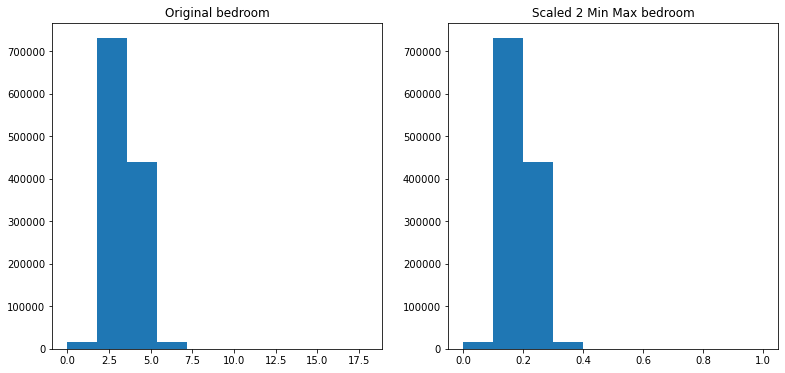

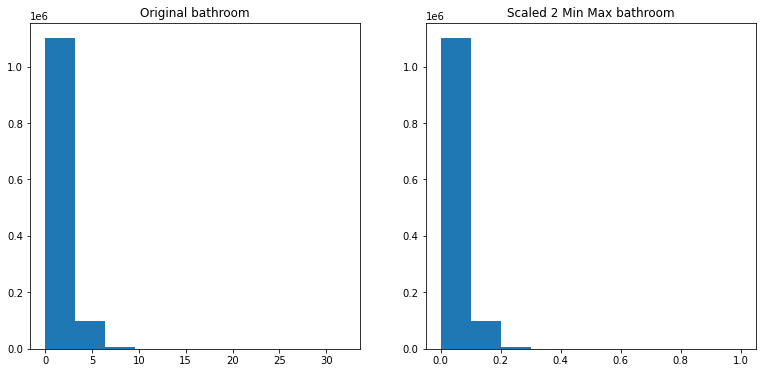

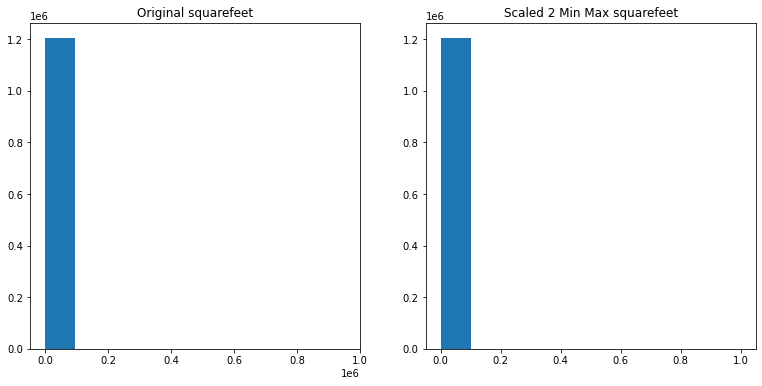

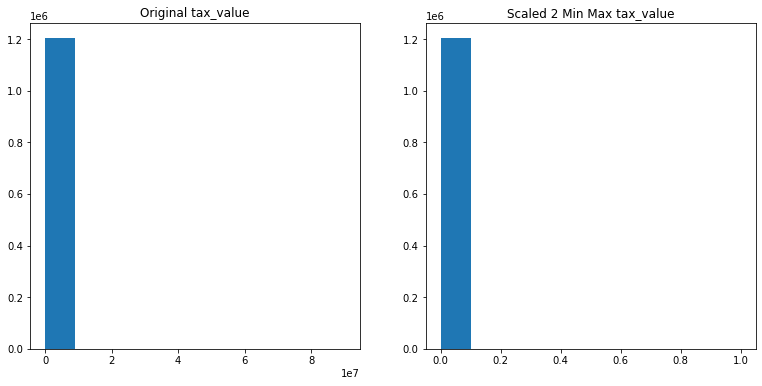

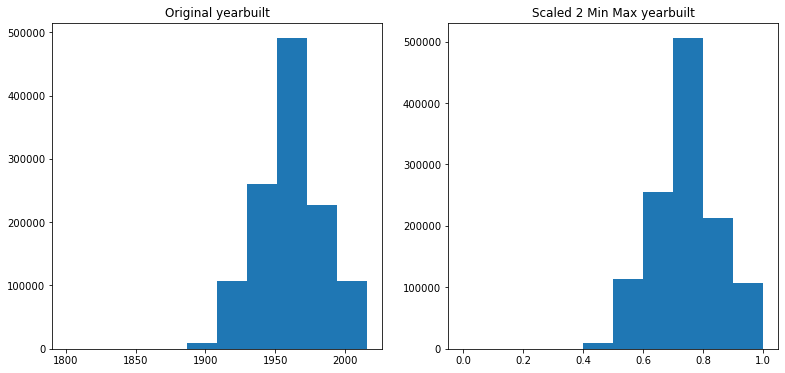

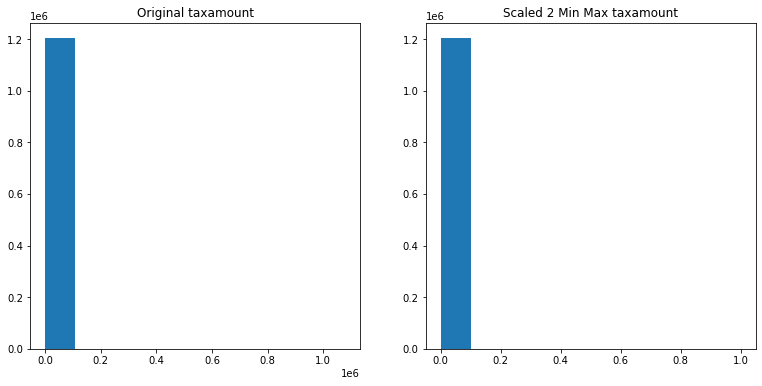

In [20]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=x_train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=x_scaled, x= i,bins=10)
    plt.title(f'Scaled 2 Min Max {i}');

In [21]:
cols = ['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount']
scaler2 = sklearn.preprocessing.StandardScaler()
scaler2.fit(x_scaled2[cols])

x_scaled2[cols] = scaler2.fit_transform(x_scaled2[cols])

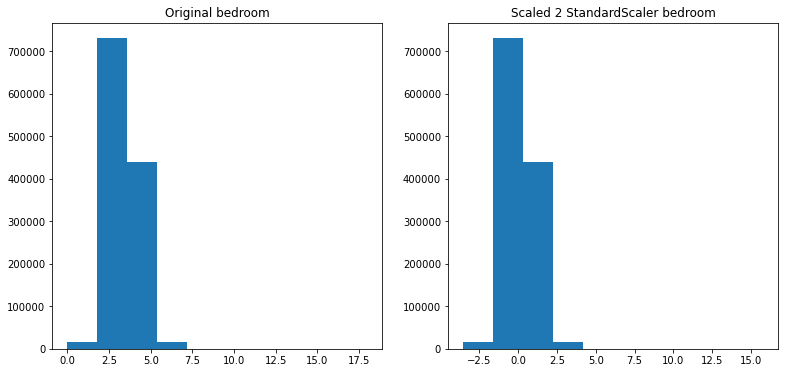

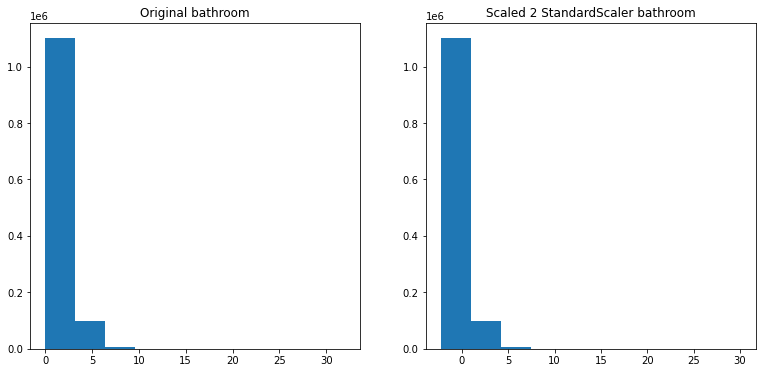

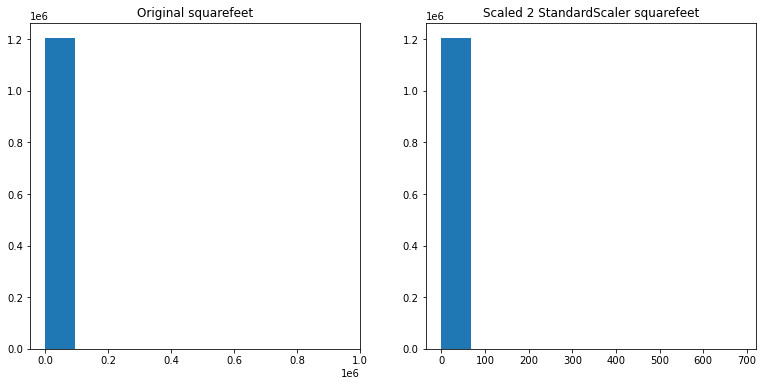

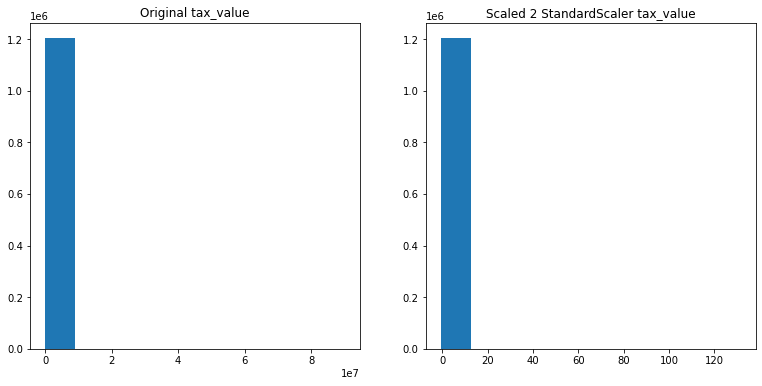

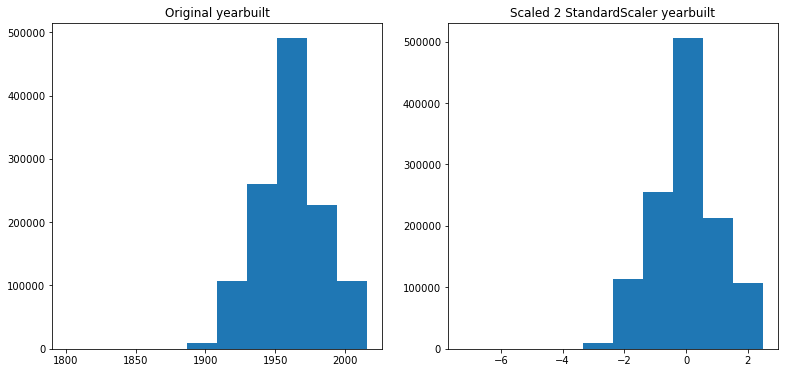

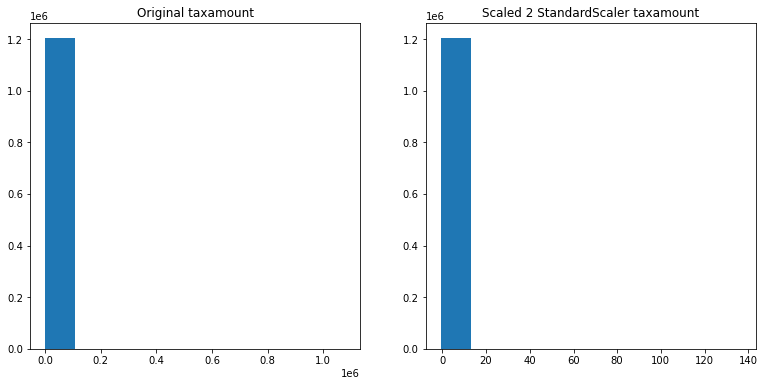

In [22]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=x_train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=x_scaled2, x= i,bins=10)
    plt.title(f'Scaled 2 StandardScaler {i}');

In [24]:
cols = ['bedroom', 'bathroom', 'squarefeet', 'tax_value', 'yearbuilt',
       'taxamount']
scaler3 = sklearn.preprocessing.RobustScaler()
scaler3.fit(x_scaled3[cols])

x_scaled3[cols] = scaler3.fit_transform(x_scaled3[cols])

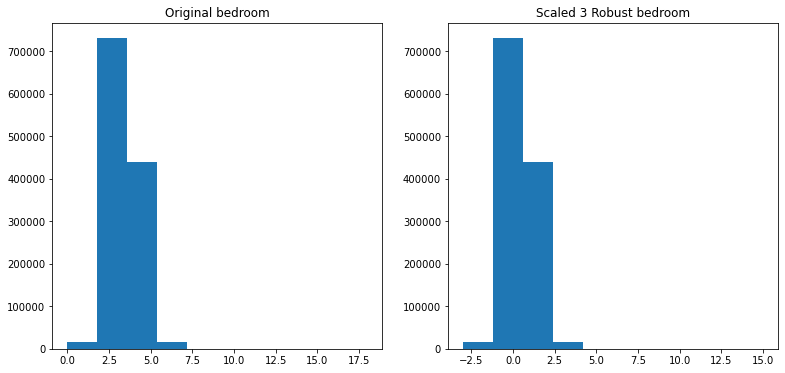

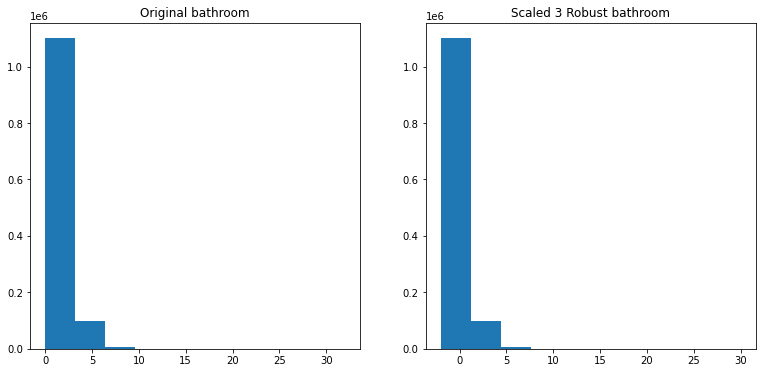

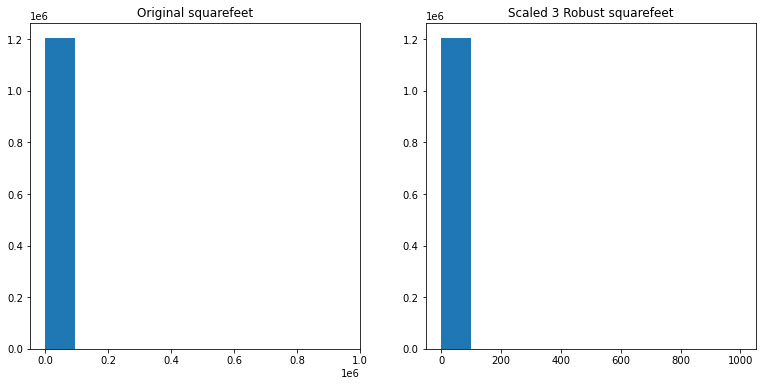

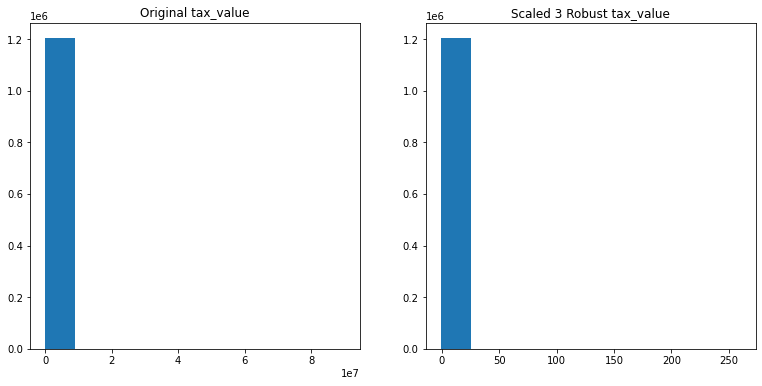

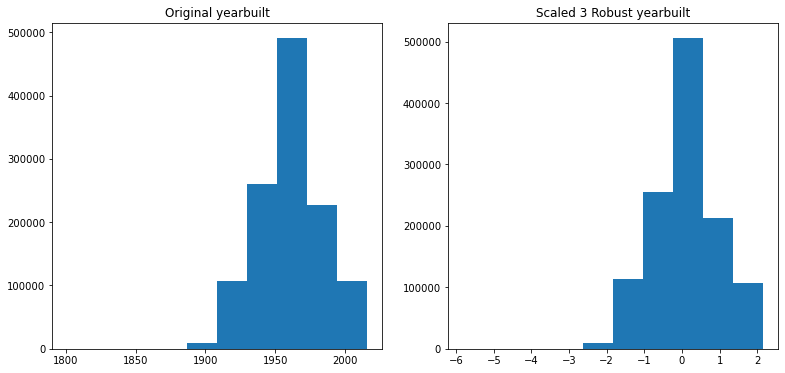

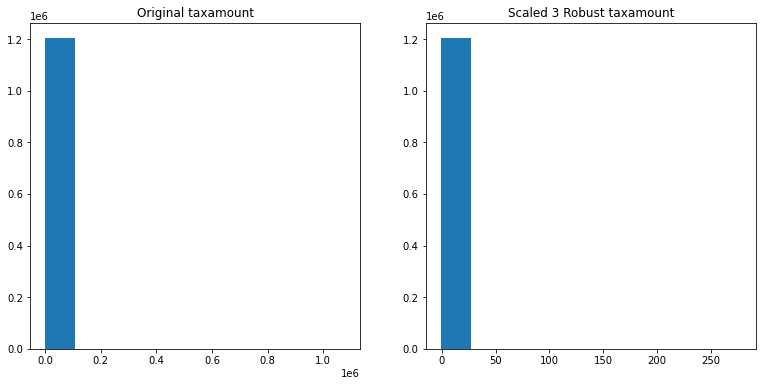

In [25]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=x_train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(122)
    plt.hist(data=x_scaled3, x= i,bins=10)
    plt.title(f'Scaled 3 Robust {i}');

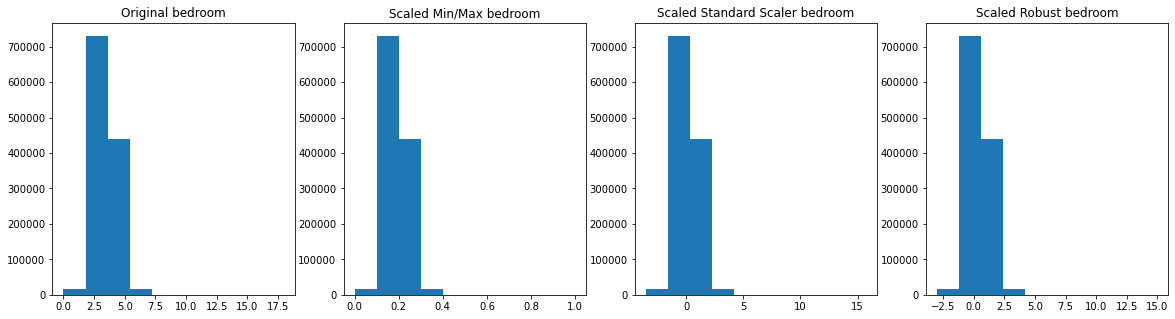

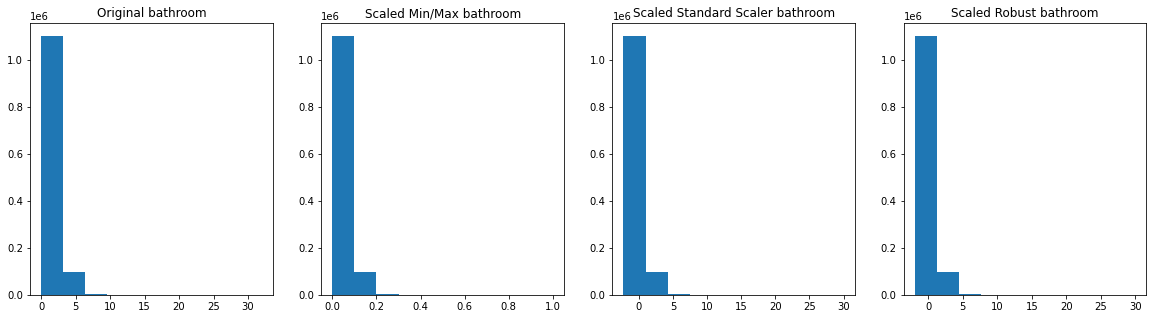

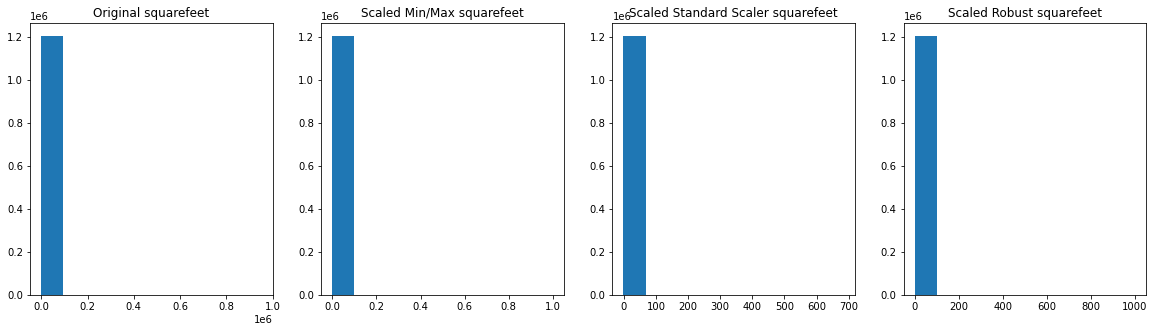

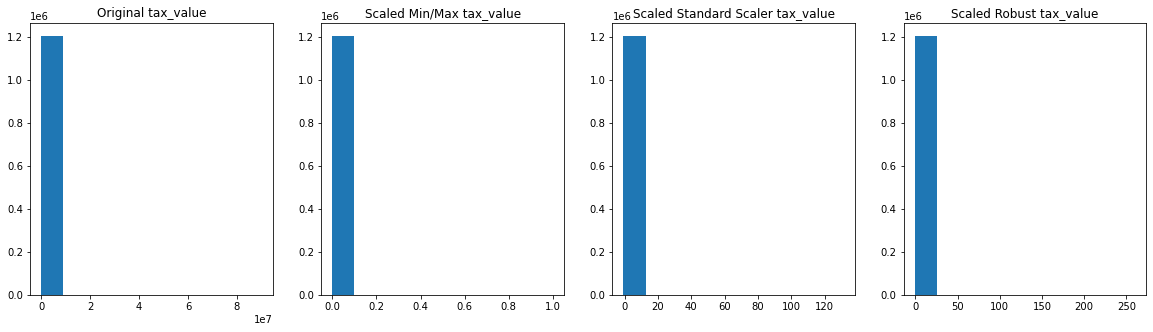

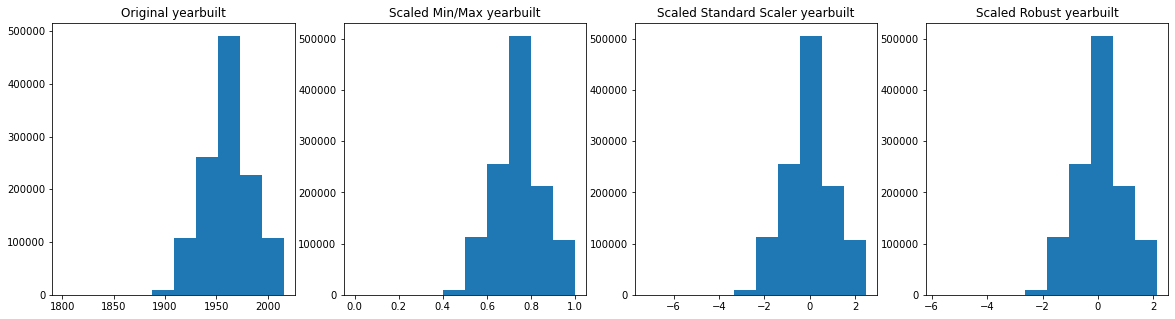

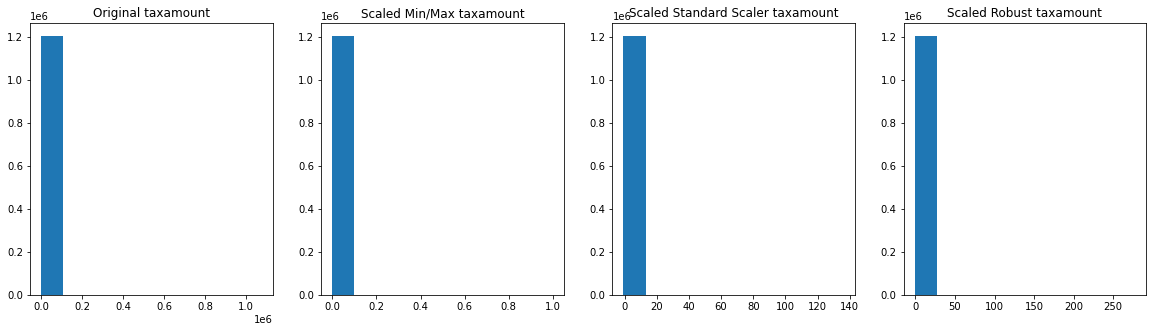

In [26]:

for i in cols:
    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.hist(data=x_train, x= i,bins=10)
    plt.title(f'Original {i}')
    plt.subplot(142)
    plt.hist(data=x_scaled, x= i,bins=10)
    plt.title(f'Scaled Min/Max {i}')
    plt.subplot(143)
    plt.hist(data=x_scaled2, x= i,bins=10)
    plt.title(f'Scaled Standard Scaler {i}')
    plt.subplot(144)
    plt.hist(data=x_scaled3, x= i,bins=10)
    plt.title(f'Scaled Robust {i}');

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [27]:
x_scaled2[cols] = scaler2.inverse_transform(x_scaled2[cols])

In [28]:
x_scaled2

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1541549,2.0,2.0,1262.0,340696.0,1938.0,4849.87,6037.0
2132824,2.0,2.0,1637.0,263899.0,1956.0,3300.92,6037.0
294433,3.0,1.0,1826.0,70002.0,1945.0,1196.56,6037.0
744668,3.0,2.0,1152.0,410745.0,1961.0,5000.60,6037.0
262091,3.0,2.0,1356.0,369913.0,1953.0,4771.14,6037.0
...,...,...,...,...,...,...,...
2095859,2.0,1.0,868.0,201724.0,1946.0,2596.20,6059.0
694269,3.0,2.0,1493.0,178104.0,1945.0,2653.78,6037.0
37473,3.0,2.0,1972.0,524856.0,1956.0,6461.58,6037.0
1489535,2.0,1.0,884.0,68479.0,1911.0,968.16,6037.0


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [29]:
 QuantileTransformer?

In [30]:
qt = QuantileTransformer(output_distribution='normal')


In [31]:
x_new1=x_train.copy()

In [32]:
x_new1[cols]= qt.fit_transform(x_train[cols])

In [33]:
x_new1

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1541549,-1.337127,-0.184203,-0.656486,0.054278,-1.149742,0.246393,6037.0
2132824,-1.337127,-0.184203,0.028859,-0.273955,-0.123259,-0.320951,6037.0
294433,-0.267884,-1.292465,0.280911,-1.507977,-0.912774,-1.401904,6037.0
744668,-0.267884,-0.184203,-0.926176,0.309039,0.119468,0.293011,6037.0
262091,-0.267884,-0.184203,-0.462610,0.163796,-0.385726,0.221371,6037.0
...,...,...,...,...,...,...,...
2095859,-1.337127,-1.292465,-1.701288,-0.598664,-0.890172,-0.652407,6059.0
694269,-0.267884,-0.184203,-0.208505,-0.725629,-0.912774,-0.624753,6037.0
37473,-0.267884,-0.184203,0.446381,0.654868,-0.123259,0.688016,6037.0
1489535,-1.337127,-1.292465,-1.654145,-1.532767,-2.211127,-1.703453,6037.0


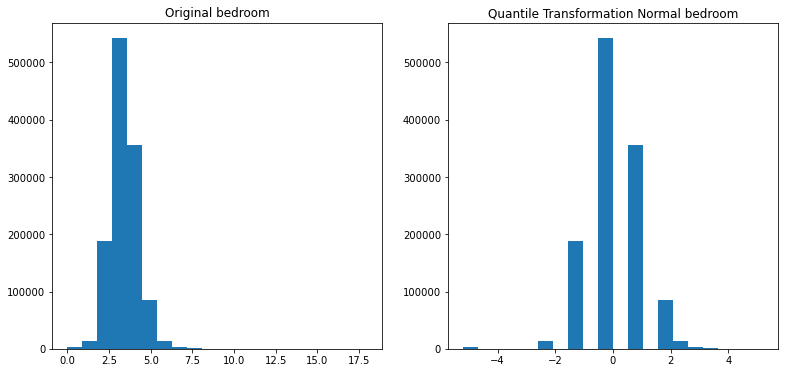

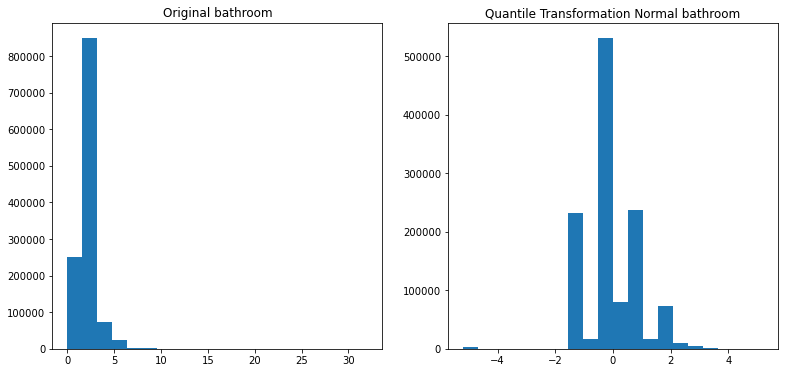

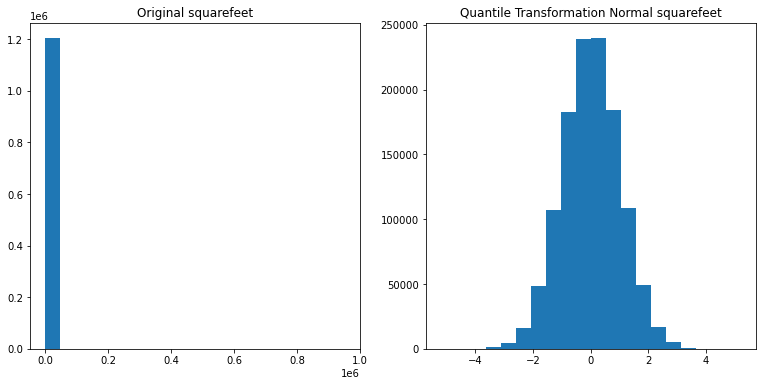

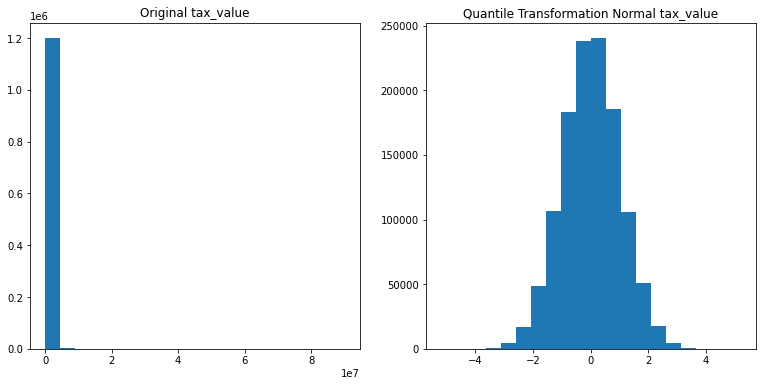

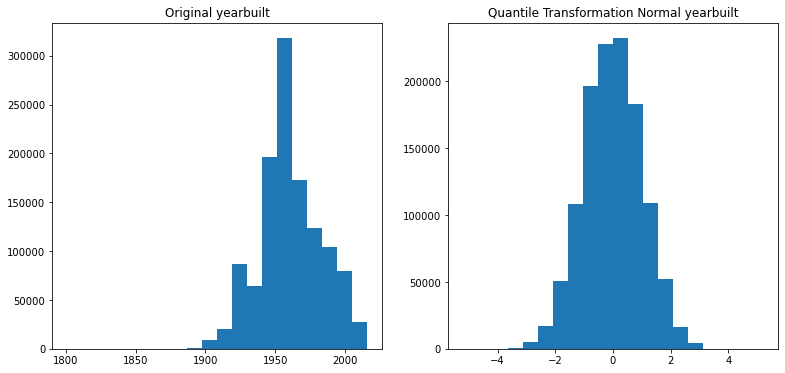

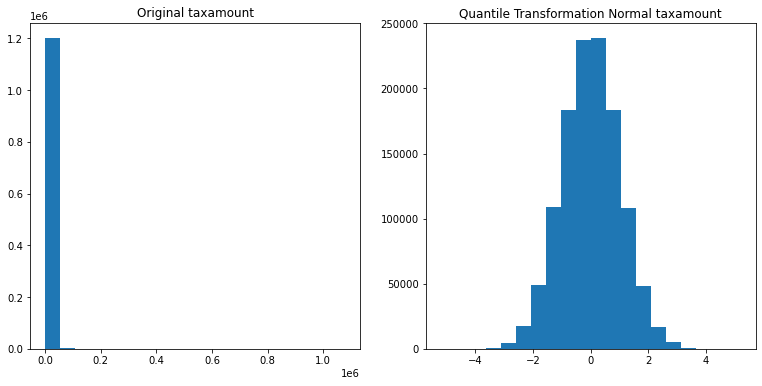

In [34]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=x_train, x= i,bins=20)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=x_new1,bins=20)
    plt.title(f'Quantile Transformation Normal {i}')

    plt.show();

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [35]:
qt2 = QuantileTransformer()
x_new2=x_train.copy()
x_new2[cols]= qt2.fit_transform(x_train[cols])
x_new2

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1541549,0.090090,0.427928,0.255756,0.519743,0.124625,0.598552,6037.0
2132824,0.090090,0.427928,0.511512,0.389911,0.453453,0.376765,6037.0
294433,0.392893,0.097598,0.612613,0.065122,0.181181,0.082235,6037.0
744668,0.392893,0.427928,0.178178,0.618804,0.549550,0.616370,6037.0
262091,0.392893,0.427928,0.323323,0.563464,0.352352,0.589511,6037.0
...,...,...,...,...,...,...,...
2095859,0.090090,0.097598,0.044294,0.270805,0.187187,0.258832,6059.0
694269,0.392893,0.427928,0.418919,0.230842,0.181181,0.267310,6037.0
37473,0.392893,0.427928,0.673173,0.742415,0.453453,0.754781,6037.0
1489535,0.090090,0.097598,0.049049,0.062354,0.013013,0.044881,6037.0


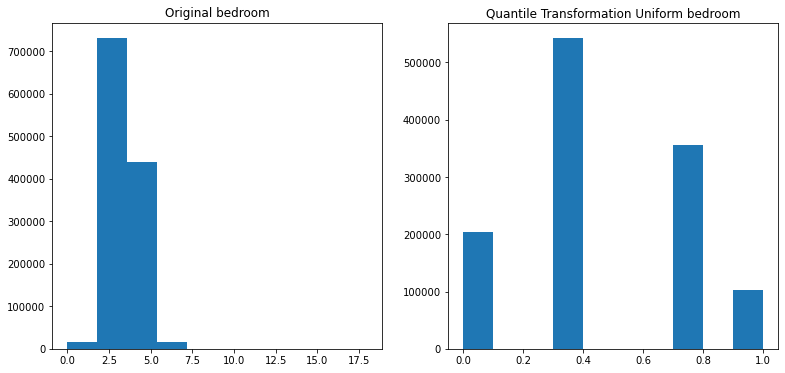

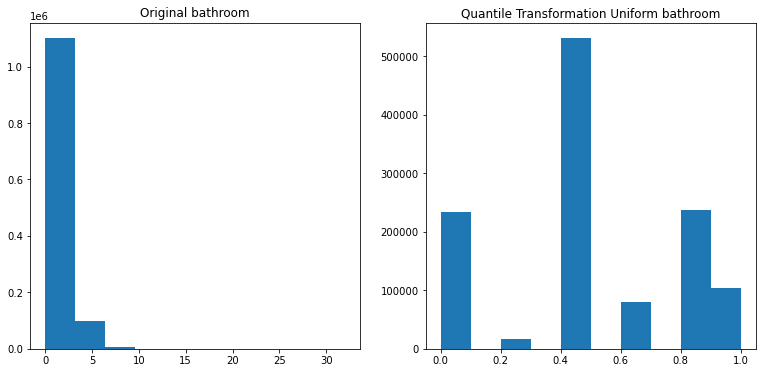

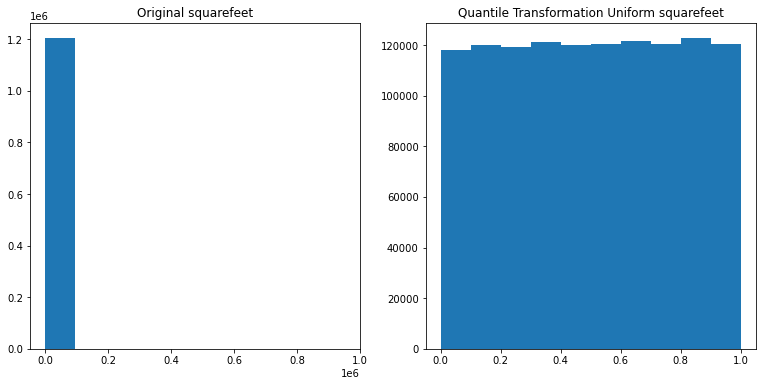

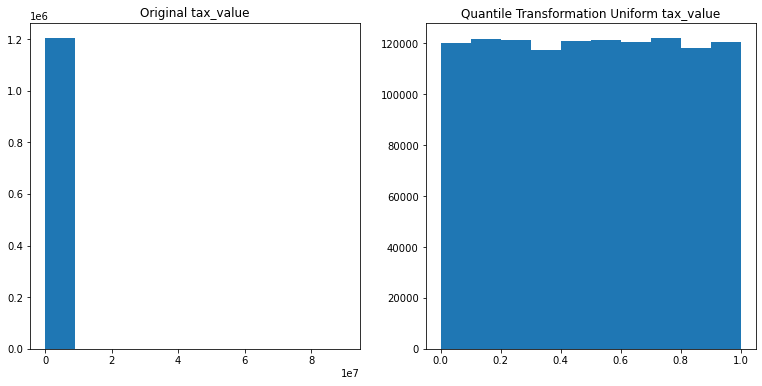

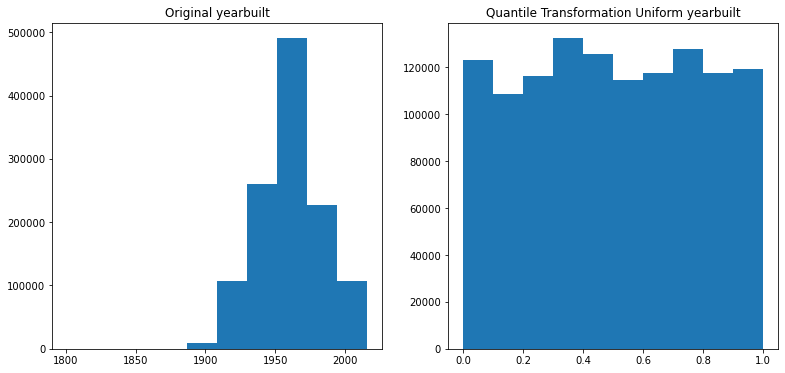

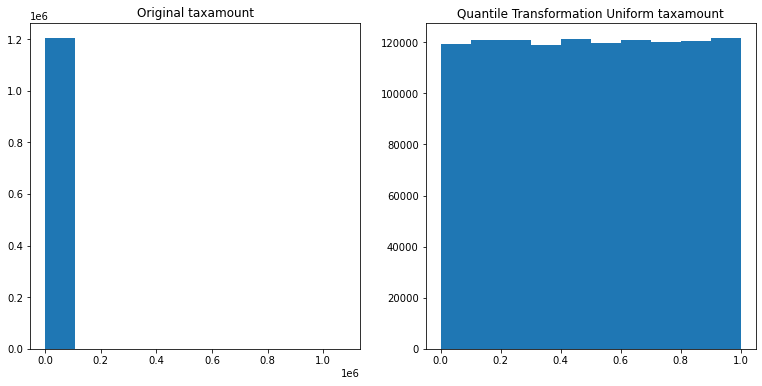

In [36]:
for i in cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data=x_train, x= i,bins=10)
    plt.title(f'Original {i}')
    
    plt.subplot(122)
    plt.hist(x= i, data=x_new2,bins=10)
    plt.title(f'Quantile Transformation Uniform {i}')

    plt.show();

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [39]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroom', 'bathroom', 'squarefeet', 'taxamount']):
    '''
    scale_data takes in train , validate, test data  and returns their scaled counterparts.
    '''
    # create copies of our original data
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #create the scaler
    scaler = QuantileTransformer(output_distribution='normal')
    # fit the scaler into train data
    scaler.fit(train[columns_to_scale])
    
    # applying the scaler to train, validate, and test data
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [42]:
train_scaled, validate_scaled, test_scaled = scale_data(x_train, x_validate,x_test)
train_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
1541549,-1.337127,-0.180377,-0.664287,340696.0,1938.0,0.247939,6037.0
2132824,-1.337127,-0.180377,0.023839,263899.0,1956.0,-0.313122,6037.0
294433,-0.269184,-1.295363,0.276563,70002.0,1945.0,-1.391086,6037.0
744668,-0.269184,-0.180377,-0.933910,410745.0,1961.0,0.295559,6037.0
262091,-0.269184,-0.180377,-0.468203,369913.0,1953.0,0.221933,6037.0
...,...,...,...,...,...,...,...
2095859,-1.337127,-1.295363,-1.705570,201724.0,1946.0,-0.640320,6059.0
694269,-0.269184,-0.180377,-0.213636,178104.0,1945.0,-0.613459,6037.0
37473,-0.269184,-0.180377,0.441766,524856.0,1956.0,0.690704,6037.0
1489535,-1.337127,-1.295363,-1.654145,68479.0,1911.0,-1.698237,6037.0


In [43]:
validate_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
252234,2.365248,2.074445,2.075049,1740015.0,1995.0,1.970934,6037.0
1708677,1.644369,2.074445,1.887288,1389387.0,1976.0,1.751140,6037.0
2007117,-0.269184,-0.180377,-0.778225,233668.0,1978.0,-0.410757,6037.0
1331004,-1.337127,-1.295363,-1.716415,215995.0,1923.0,-0.472535,6037.0
43411,1.644369,0.475214,0.512061,433972.0,1965.0,0.173205,6111.0
...,...,...,...,...,...,...,...
477823,-0.269184,-0.180377,-0.305796,220115.0,1976.0,-0.541986,6037.0
1339441,-0.269184,-0.180377,0.821412,1139087.0,1973.0,1.520299,6037.0
1443480,-0.269184,-0.180377,0.066541,452810.0,1972.0,0.370933,6111.0
1604567,-0.269184,-0.180377,0.071571,78594.0,1964.0,-1.864569,6111.0


In [44]:
test_scaled

,bedroom,bathroom,squarefeet,tax_value,yearbuilt,taxamount,fips
413974,-0.269184,-0.180377,-0.362850,186697.0,1963.0,-0.560222,6037.0
41333,-1.337127,0.475214,0.393847,587421.0,1998.0,0.843910,6059.0
1796752,0.728240,1.411293,1.497997,796473.0,1992.0,1.202263,6059.0
1811458,-0.269184,-0.180377,-0.087933,848481.0,1950.0,1.313788,6037.0
782643,0.728240,-0.180377,-0.680013,251385.0,1958.0,-0.387869,6037.0
...,...,...,...,...,...,...,...
2066069,-0.269184,-0.180377,-0.249721,121124.0,1976.0,-1.342589,6059.0
1797446,-0.269184,-0.180377,0.124523,497000.0,2001.0,0.758253,6037.0
2093011,0.728240,0.897655,0.668203,245565.0,1979.0,-0.184813,6037.0
1805230,-1.337127,-1.295363,-1.981390,123669.0,1948.0,-1.029297,6037.0
